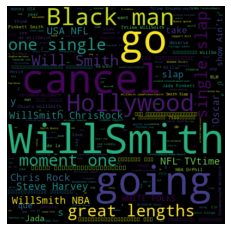

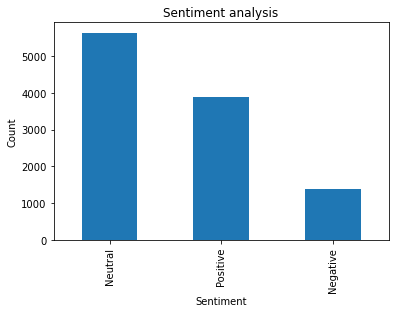

In [75]:
import pandas as pd
import tweepy
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# df = pd.read_json('output.json')
# df.to_csv('data.csv')
consumer_key = 'E4la57r5OwcofajnrdtKJTE1W'
consumer_secret = '7m9mzTwMMSEVVmEHtzK7suTUgwyEEJYdLckNoFC7husEEgTao9'
access_token = '2942662970-tUvaWqtMJCSZcXtBUXUkBIjQNsXmDV0Fv9REkQ8'
access_token_secret = 't0zfRbilLcGWDKMsOExi1MSR4AUFbA1WBRcZTL3U5xnVK'
    # twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# df = pd.read_csv('data.csv') #Reading CSV file
tweetsDF = pd.read_json('output.json') #Reading json file
# df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
# print (tweetsDF['full_text'])
# for index, row in tweetsDF[0:10].iterrows():
#     print(index,row['full_text'])



def cleanData(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+','', tweet) #remove @mentions
    tweet = re.sub(r'#+','', tweet) #remove # symbols
    tweet = re.sub(r'RT[\s]+','', tweet) #remove RT
    tweet = re.sub(r'https?:\/\/\S+','', tweet) #remove hyperlink
    return tweet

# apply regex on tweet to clean data
tweetsDF['full_text'] = tweetsDF['full_text'].apply(cleanData)
tweetsDF['full_text'][0:20]

    
#analysis
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

    # applying analysis on our text
tweetsDF['subjectivity'] = tweetsDF['full_text'].apply(getSubjectivity)
tweetsDF['polarity'] = tweetsDF['full_text'].apply(getPolarity)

#new results
# tweetsDF[['full_text', 'subjectivity', 'polarity',]]



#word cloud to plot most commonly used words in tweets
allWords = ''.join([tweets for tweets in tweetsDF['full_text']])
wordCloud = WordCloud(width =400, height = 400, random_state =21, max_font_size = 120).generate(allWords)
# plotting data 
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


#negative, positive and neutral analysis
def getAnalysis(score):
    if(score<0):
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweetsDF['analysis'] = tweetsDF['polarity'].apply(getAnalysis)
# tweetsDF[['full_text', 'subjectivity', 'polarity', 'analysis']][60:80]

#positive or negative tweets
# use sortedDF.shape[0] to get the number of rows of data
def getParticularTweets(sentiment):
    if sentiment == 'Positive':
        sortedDF = tweetsDF.sort_values(by=['polarity'])
        for i in range(0, 5):
            if (sortedDF['analysis'][i] == 'Positive'):
                print(i+')'+sortedDF['full_text'][i])
                print()
    elif sentiment == 'Negative':
        sortedDF = tweetsDF.sort_values(by=['polarity'], ascending='False')
        for i in range(0, 100):
            if (sortedDF['analysis'][i] == 'Negative'):
                print(str(i)+')'+sortedDF['full_text'][i])
                print()
    else:
        print('wrong sentiment')

# getParticularTweets('Negative')


# plotting the data 
# plt.figure(figsize=(8,6))
# for i in range (0, tweetsDF.shape[0]):
#     plt.scatter(tweetsDF['polarity'][i], tweetsDF['subjectivity'][i], color='Blue')

# plt.title('Sentiment analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')


#percentage of positive tweets
#rounded by 1 decimal place
# ptweets = tweetsDF[tweetsDF.analysis == 'Positive']
# tweetsDF = tweetsDF['full_text']
# round((ptweets.shape[0]/tweetsDF.shape[0])*100,1)

# #percentage of negative tweets
# ntweets = tweetsDF[tweetsDF.analysis == 'Negative']
# tweetsDF = tweetsDF['full_text']
# round((ntweets.shape[0]/tweetsDF.shape[0])*100,1)

# #percentage of neutral tweets
# neutweets = tweetsDF[tweetsDF.analysis == 'Neutral']
# tweetsDF = tweetsDF['full_text']
# round((neutweets.shape[0]/tweetsDF.shape[0])*100,1)


# plotting the percentage of sentiments type
tweetsDF['analysis'].value_counts()
plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweetsDF['analysis'].value_counts().plot(kind='bar') # use the kind of plot to display data in different form
plt.show()
